### Cargar los datos

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [32]:
data = pd.read_csv("../data/yt_data.csv")

In [33]:
data["category_name"].value_counts()

Entertainment            9852
Music                    6133
Howto & Style            4101
Comedy                   3454
People & Blogs           3137
News & Politics          2483
Science & Technology     2386
Film & Animation         2340
Sports                   2166
Education                1656
Pets & Animals            920
Gaming                    786
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      48
Name: category_name, dtype: int64

### ¿Qué categorías de videos son las de mayor tendencia?

In [34]:
data["category_name"].value_counts()
print(data["category_name"].value_counts().head())

Entertainment     9852
Music             6133
Howto & Style     4101
Comedy            3454
People & Blogs    3137
Name: category_name, dtype: int64


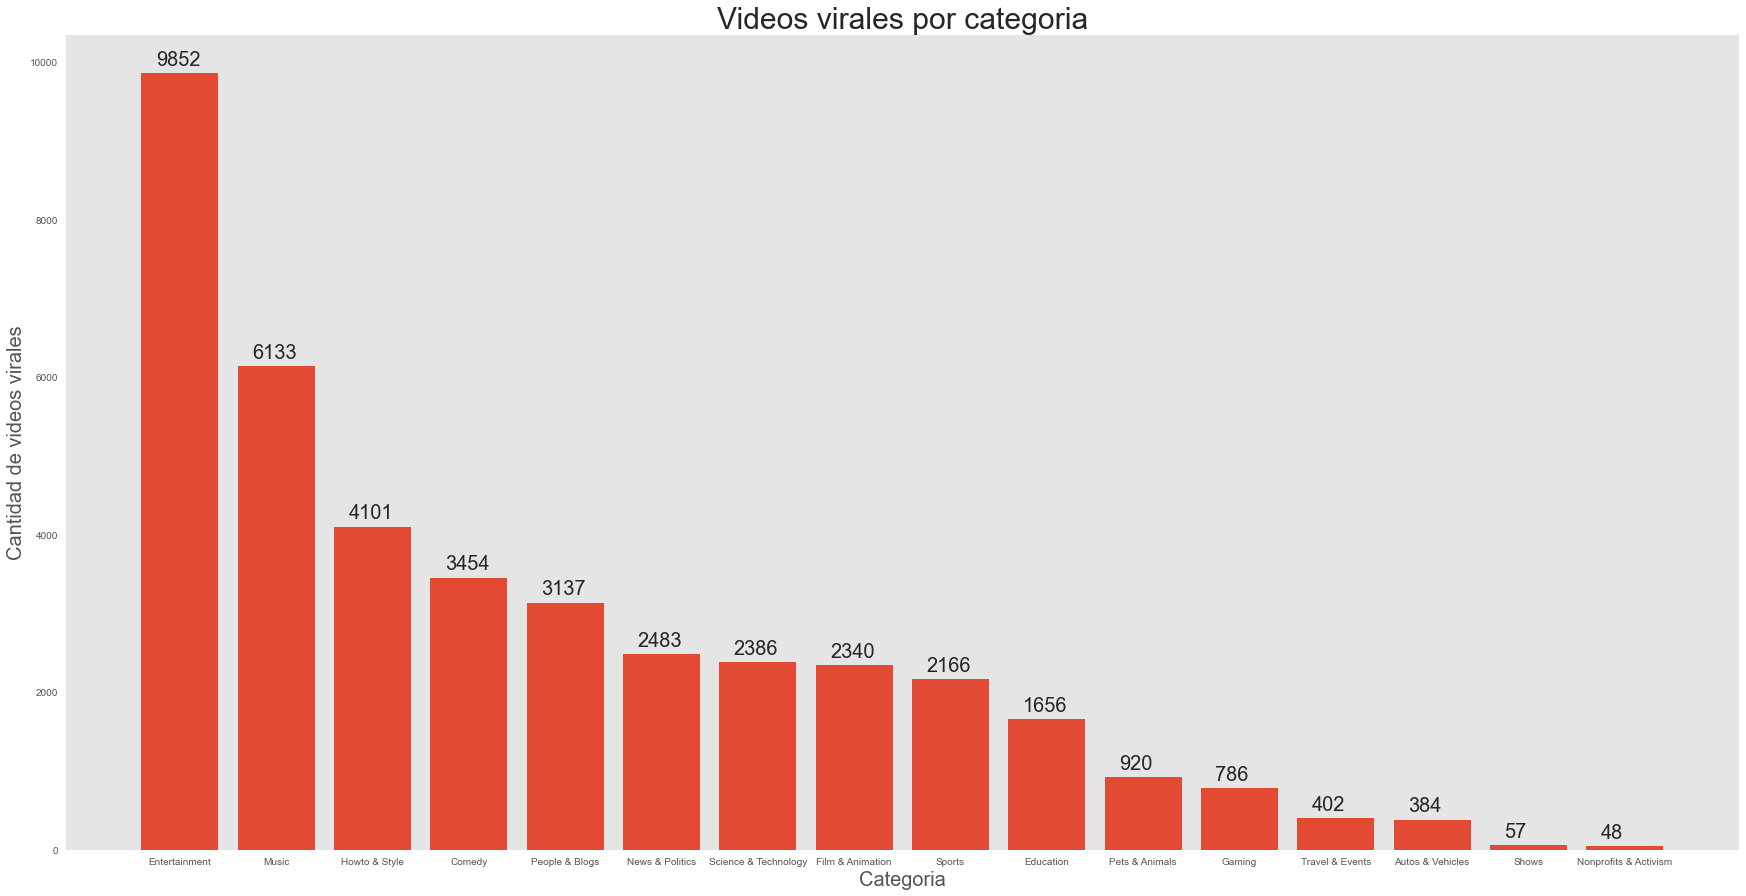

In [35]:
keys = data["category_name"].value_counts().keys()
nums = data["category_name"].value_counts().values

fig, ax = plt.subplots(figsize=(30,15))
ax.grid()
ax.set_xlabel("Categoria", fontsize = 20)
ax.set_ylabel("Cantidad de videos virales", fontsize = 20)
ax.set_title("Videos virales por categoria", fontsize = 30)
ax.bar(keys,nums)
for i, v in enumerate(nums):
    ax.text(i-0.25,v+100,str(v),fontsize=20)

###  ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

In [36]:
print(data.groupby("category_name")["likes"].mean())
print("Mas likes:",data.groupby("category_name")["likes"].mean().max())

category_name
Autos & Vehicles          11056.395833
Comedy                    62238.656920
Education                 29745.031401
Entertainment             41575.022635
Film & Animation          70191.526496
Gaming                    75370.567430
Howto & Style             38111.223848
Music                    136764.139410
News & Politics            7301.104309
Nonprofits & Activism      3732.937500
People & Blogs            49061.145043
Pets & Animals            21055.110870
Science & Technology      31399.232607
Shows                     18993.666667
Sports                    44853.054017
Travel & Events           12030.462687
Name: likes, dtype: float64
Mas likes: 136764.13940975053


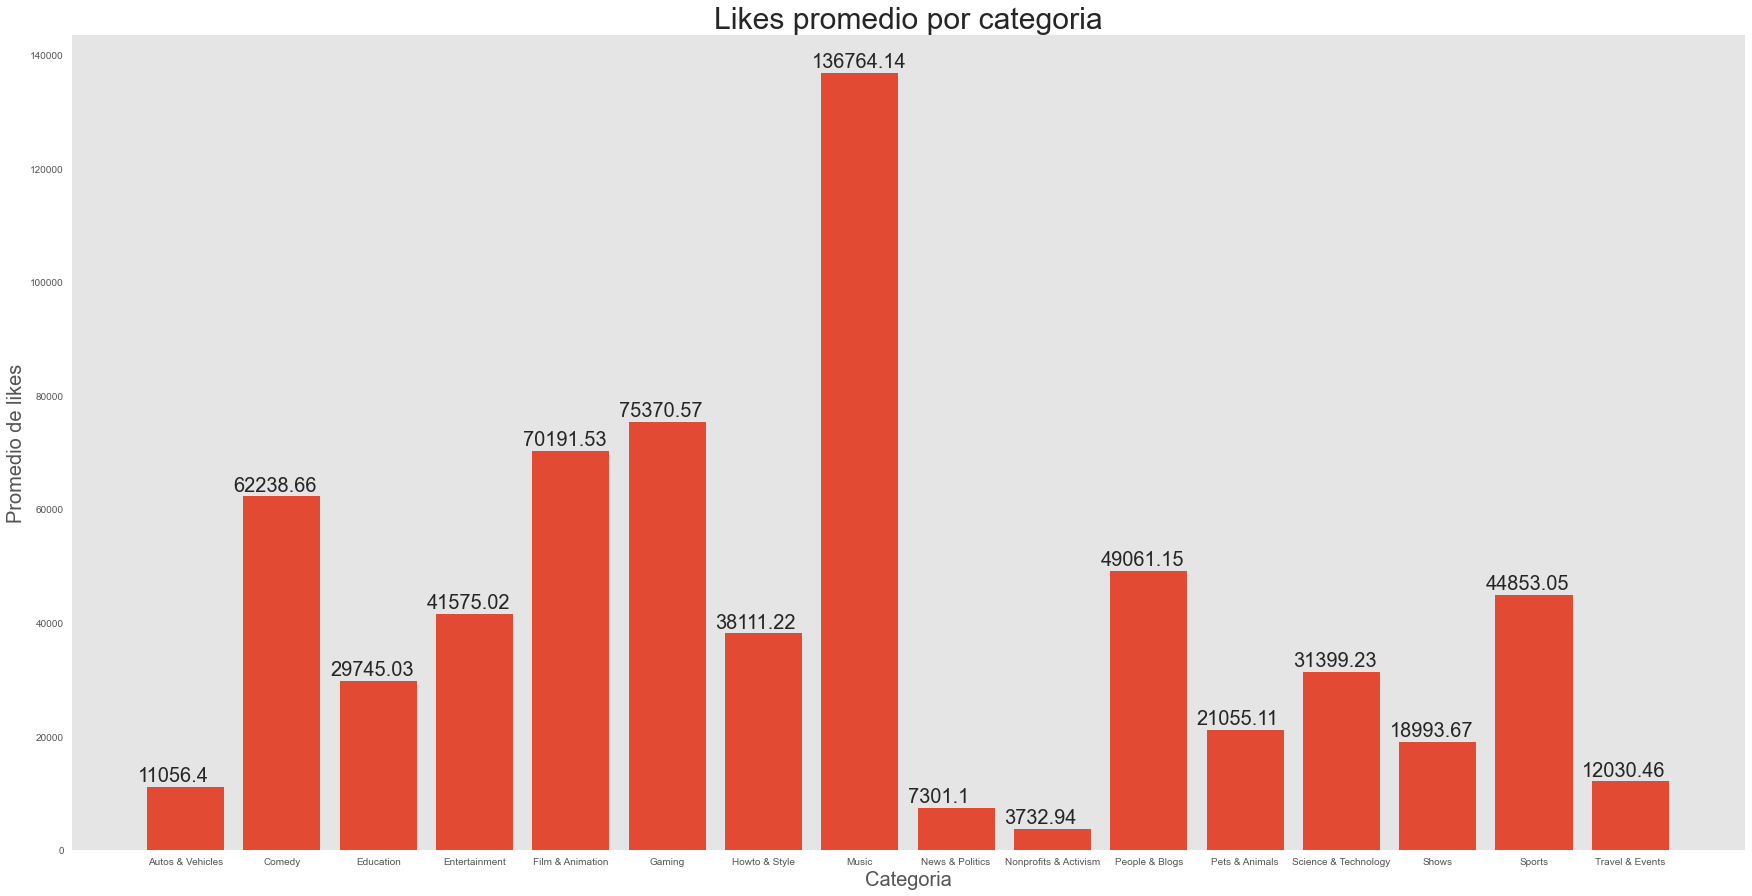

In [37]:
keys = data.groupby("category_name")["likes"].mean().keys()
nums = round(data.groupby("category_name")["likes"].mean(),2)

fig, ax = plt.subplots(figsize=(30,15))
ax.grid()
ax.set_xlabel("Categoria", fontsize = 20)
ax.set_ylabel("Promedio de likes", fontsize = 20)
ax.set_title("Likes promedio por categoria", fontsize = 30)
ax.bar(keys,nums)
for i, v in enumerate(nums):
    ax.text(i-0.5,v+1000,str(v),fontsize=20)

In [38]:
print(data.groupby("category_name")["dislikes"].mean())
print("Mas dislikes:",data.groupby("category_name")["dislikes"].mean().max())

category_name
Autos & Vehicles          632.838542
Comedy                   2089.829184
Education                 816.408213
Entertainment            1960.038774
Film & Animation         2579.458974
Gaming                   4970.534351
Howto & Style            1288.376250
Music                    4076.920104
News & Politics          1481.843737
Nonprofits & Activism     154.229167
People & Blogs           1798.113484
Pets & Animals            573.238043
Science & Technology     1723.391031
Shows                     429.964912
Sports                   1862.668513
Travel & Events           846.833333
Name: dislikes, dtype: float64
Mas dislikes: 4970.534351145038


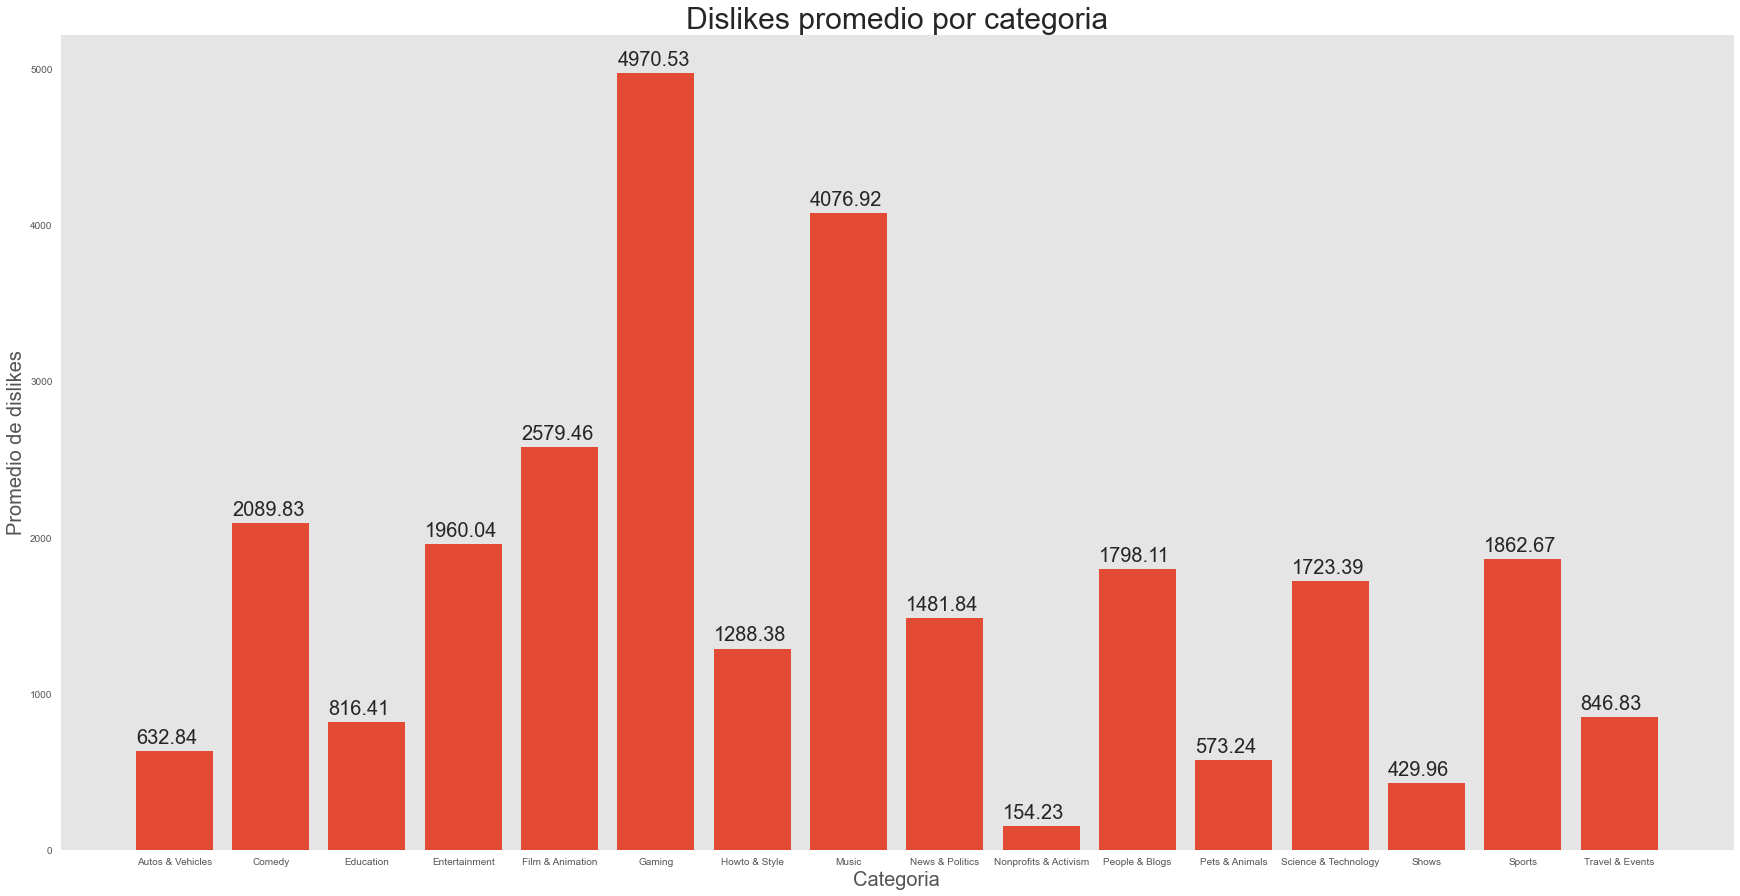

In [39]:
keys = data.groupby("category_name")["dislikes"].mean().keys()
nums = round(data.groupby("category_name")["dislikes"].mean(),2)

fig, ax = plt.subplots(figsize=(30,15))
ax.grid()
ax.set_xlabel("Categoria", fontsize = 20)
ax.set_ylabel("Promedio de dislikes", fontsize = 20)
ax.set_title("Dislikes promedio por categoria", fontsize = 30)
ax.bar(keys,nums)
for i, v in enumerate(nums):
    ax.text(i-0.4,v+50,str(v),fontsize=20)

###  ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

In [40]:
likesByCategory = data.groupby("category_name")["likes"].sum()
dislikesByCategory = data.groupby("category_name")["dislikes"].sum()
print(likesByCategory.head())
print(dislikesByCategory.head())

category_name
Autos & Vehicles      4245656
Comedy              214972321
Education            49257772
Entertainment       409597123
Film & Animation    164248172
Name: likes, dtype: int64
category_name
Autos & Vehicles      243010
Comedy               7218270
Education            1351972
Entertainment       19310302
Film & Animation     6035934
Name: dislikes, dtype: int64


In [41]:
likeDisRatio = likesByCategory/dislikesByCategory
print("Mejor ratio de likes y dislikes:",round(likeDisRatio,2).max())

Mejor ratio de likes y dislikes: 44.17


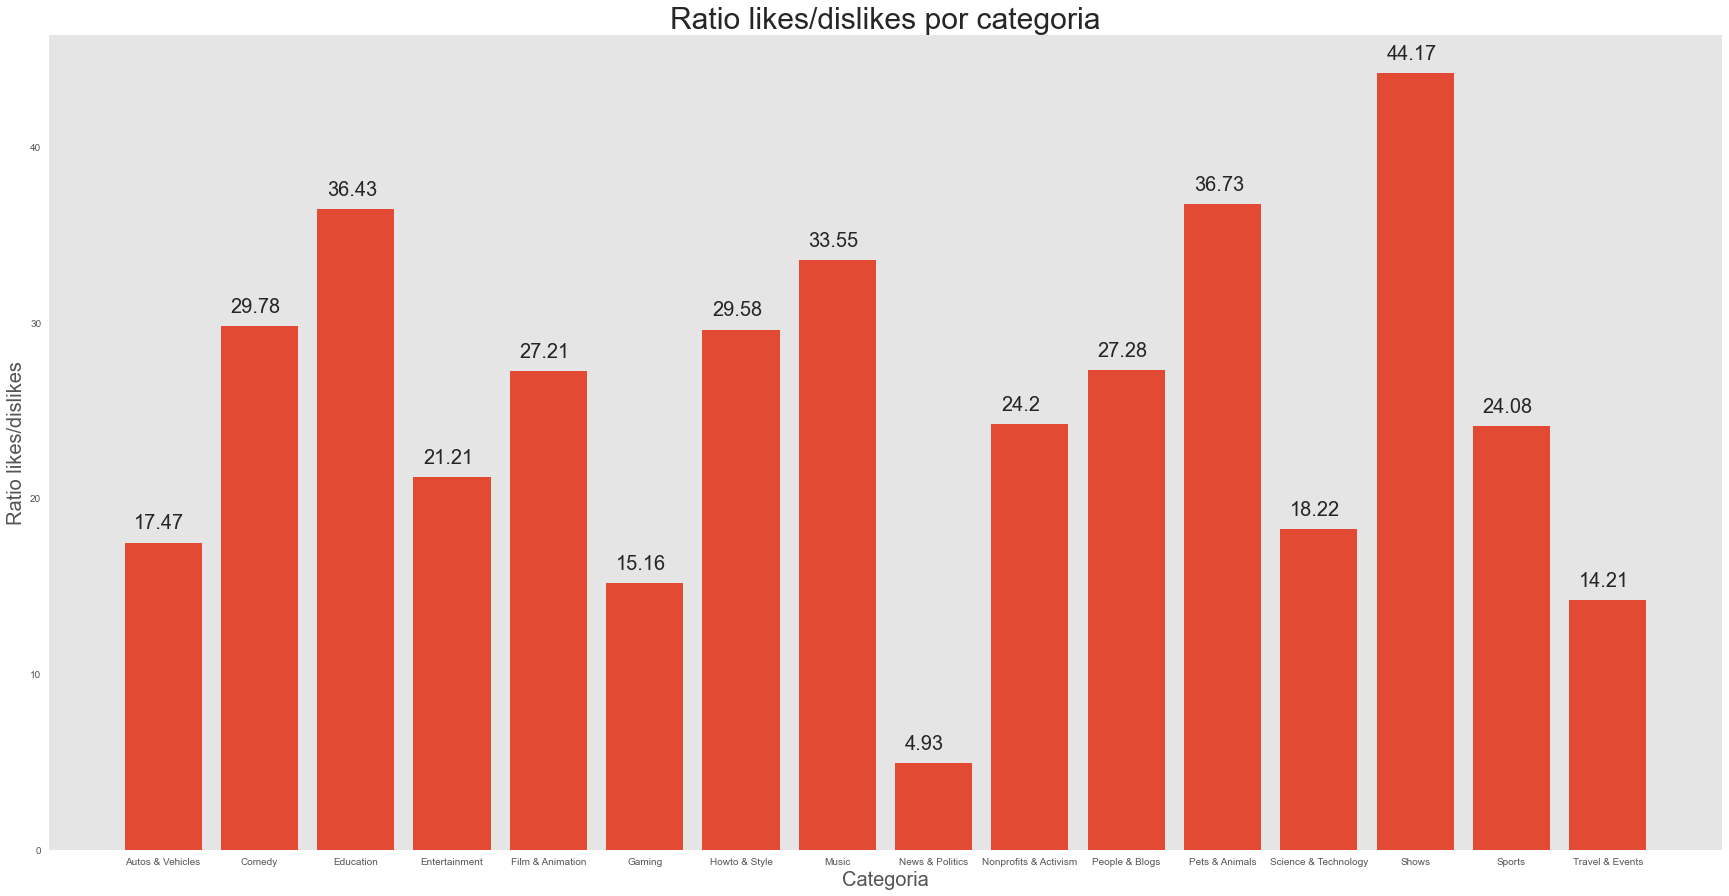

In [42]:
keys = likeDisRatio.keys()
nums = round(likeDisRatio,2).values

fig, ax = plt.subplots(figsize=(30,15))
ax.grid()
ax.set_xlabel("Categoria", fontsize = 20)
ax.set_ylabel("Ratio likes/dislikes", fontsize = 20)
ax.set_title("Ratio likes/dislikes por categoria", fontsize = 30)
ax.bar(keys,nums)
for i, v in enumerate(nums):
    ax.text(i-0.3,v+0.8,str(v),fontsize=20)

###  ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

In [43]:
viewsByCategory = data.groupby("category_name")["views"].sum()
commentsByCategory = data.groupby("category_name")["comment_count"].sum()
print(viewsByCategory.head())
print(commentsByCategory.head())

category_name
Autos & Vehicles      520690717
Comedy               5100506974
Education            1180629990
Entertainment       16939673759
Film & Animation     7269068926
Name: views, dtype: int64
category_name
Autos & Vehicles      784447
Comedy              22303477
Education            5442242
Entertainment       44728627
Film & Animation    17390720
Name: comment_count, dtype: int64


In [44]:
viewComRatio = viewsByCategory/commentsByCategory
print("Mejor ratio de views y comentarios:",round(viewComRatio,2).min())

Mejor ratio de views y comentarios: 175.03


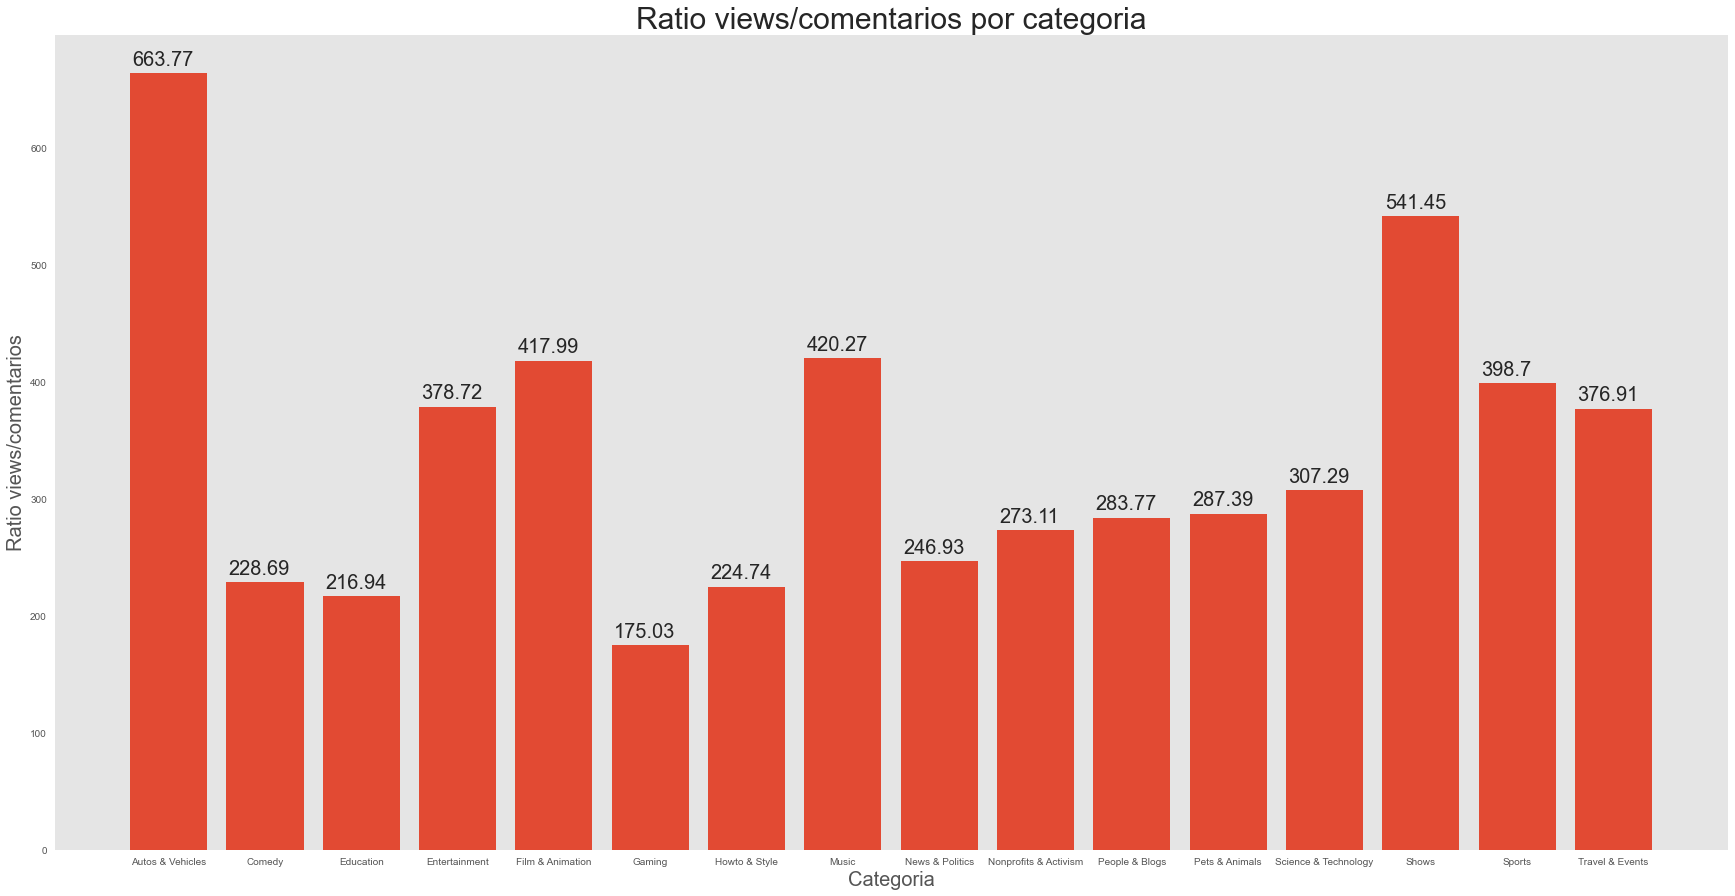

In [45]:
keys = viewComRatio.keys()
nums = round(viewComRatio,2).values

fig, ax = plt.subplots(figsize=(30,15))
ax.grid()
ax.set_xlabel("Categoria", fontsize = 20)
ax.set_ylabel("Ratio views/comentarios", fontsize = 20)
ax.set_title("Ratio views/comentarios por categoria", fontsize = 30)
ax.bar(keys,nums)
for i, v in enumerate(nums):
    ax.text(i-0.375,v+7,str(v),fontsize=20)